 

# Project: Investigating Suicide rates - [GAPMINDER]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this Project, I have used data provided by -Gapminder World- and have picked dataset I see most related to suicide rate. out of the attributes picked, several attributes have been chosen to study the relation between suicide rates and attributes in different countries; below is a breif of every attribute:-

- Suicide_men     : No. of men commiting suicide for every 100k population in country
- Suicide_women   : No. of women commiting suicide for every 100k population in country
- Sex_ratio       : Ratio of men to women in population of country (in order to study effect of ratio on difference in suicide numbers of genders)
- gini index      : Index indicating Inequality of country 
- emp_rate        : Rate of Employment for country
- hdi             : Human development index indicating health, education and human development of population (the higher the 
- web_users       : No of web users per 100k of population
- health_gdp      : GDP spent as percantage towards health
- working_hours   : Average working hours for every country



### Question(s) for Analysis
We will investigate each attribute and colleration between in and suicide rates, starting with if gender plays a role in suicide. Studuying the countries settings such as employment rate and hours worked, and how equal people are in the society.
If Social level and wealth play a huge factor and whether modernization such as social media influence play a role.



In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import matplotlib.pyplot as plt



#### Load all CSVs required for analysis

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
suicide_men= pd.read_csv('suicide_men_per_100000_people.csv')
suicide_women= pd.read_csv('suicide_women_per_100000_people.csv')
sex_ratio= pd.read_csv('sex_ratio_all_age_groups.csv')
gini= pd.read_csv('gini.csv')
emp_rate= pd.read_csv('aged_15plus_employment_rate_percent.csv')
hdi= pd.read_csv('hdi_human_development_index.csv')
web_users= pd.read_csv('internet_users.csv')
health_gdp=pd.read_csv('total_health_spending_percent_of_gdp.csv')
working_hours=pd.read_csv('working_hours_per_week.csv')


<a id='wrangling'></a>
## Data Wrangling

We will first select years 2005-2020 out of years in datasets and drop the rest of the years, then fill NaN values of years by mean of country in all attributes.

All dataframes will be merged into one dataframe by taking all attributes mean value for all years between 2005-2020 



## List of atttributes names

In [4]:
attributes_df=[ suicide_men , suicide_women , sex_ratio , gini , emp_rate , hdi , web_users , health_gdp, working_hours]


In [5]:
attributes_df[0].head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.23,6.80,NaN,3.86,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.69,NaN,NaN,NaN,3.91,2.81,2.52,3.39,3.33
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,13.9,14.3,16.0,15.8,16.2,15.5,16.0,17.8,19.0,...,15.00,15.70,14.8,15.20,14.8,15.40,15.30,16.90,17.60,NaN


In [6]:
attributes_df[7].columns

Index(['country', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'],
      dtype='object')

### Studying Years 2005 - 2020

In [7]:
years = list(map(str, range(2005,2021)))
years.append('country')
years

['2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 'country']

### Drop all columns not between 2005 to 2020

In [8]:
#new_list = list(suicide_men.columns.values).difference(years)

new_list = [x for x in suicide_men.columns if x not in years]

suicide_men.drop(columns = new_list , axis=1 , inplace=True)

suicide_men.head()


,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,5.23,6.80,NaN,3.86,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Armenia,NaN,NaN,NaN,2.69,NaN,NaN,NaN,3.91,2.81,2.52,3.39,3.33
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,NaN,14.7,15.00,15.70,14.8,15.20,14.8,15.40,15.30,16.90,17.60,NaN


#### Mean suicide for men of about 15 person per 100k over the last few years

In [9]:

suicide_men.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,49.000000,45.000000,52.000000,53.000000,51.000000,50.000000,55.000000,51.000000,50.000000,50.000000,40.000000,14.000000
mean,17.720082,17.185924,15.481000,15.212966,16.256804,15.548420,14.596018,15.183020,15.823400,14.586400,15.210855,17.147143
std,10.903072,9.572942,9.637904,10.281994,10.599577,10.034645,9.617839,9.141269,9.570404,9.281411,8.593569,9.639320
min,0.124000,0.086600,0.069000,0.094200,0.255000,0.187000,0.185000,0.156000,0.110000,0.119000,0.084200,3.330000
25%,9.310000,11.100000,9.065000,8.710000,9.420000,8.757500,8.530000,9.000000,9.772500,8.887500,9.530000,12.375000
50%,16.100000,15.700000,15.150000,14.100000,15.200000,14.350000,14.200000,14.200000,14.650000,13.550000,13.700000,15.750000
75%,23.800000,21.500000,20.375000,20.600000,20.950000,20.675000,18.900000,20.200000,20.425000,19.175000,19.875000,20.675000
max,62.200000,48.600000,50.000000,54.400000,55.700000,49.500000,49.800000,46.400000,54.900000,47.700000,45.000000,42.700000


## Data Cleaning

#### Droping columns not between 2005 and 2020 for ALL attributes 

In [10]:
for att in attributes_df:
    
    drop_list = [x for x in att.columns if x not in years]
    att.drop(columns = drop_list , axis=1 , inplace=True)
    


### Fill NA values of attributes with mean of country

In [11]:
for i in range(2,9):
    
    attributes_df[i].T.fillna(attributes_df[i].T.mean(axis=0), axis=0).T
  


##### Suicide rate for men & women across the years

<AxesSubplot:title={'center':'Men suicide mean per 100k for 2005-2020'}, xlabel='Year', ylabel='Men suicide mean'>

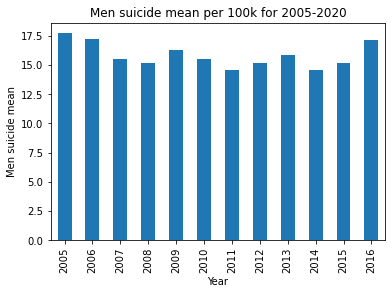

In [12]:
plt.xlabel("Year")
plt.ylabel("Men suicide mean")
plt.title('Men suicide mean per 100k for 2005-2020')

suicide_men.mean().plot.bar()


In [13]:
suicide_women.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,3.04,3.92,NaN,2.28,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Armenia,NaN,NaN,NaN,1.02,NaN,NaN,NaN,1.08,1.13,0.757,0.969,0.673
3,Australia,NaN,4.33,4.55,4.31,4.52,4.49,4.74,5.29,5.20,5.550,5.710,NaN
4,Austria,6.02,4.81,5.11,5.02,4.90,4.87,5.26,4.32,5.23,5.070,4.550,4.830


<AxesSubplot:title={'center':'Women suicide mean per 100k for 2005-2020'}, xlabel='Year', ylabel='Women suicide mean'>

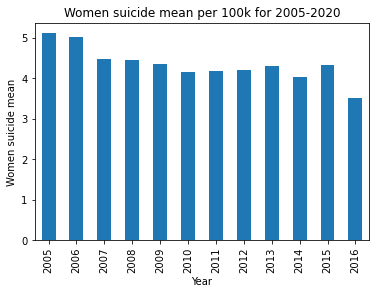

In [14]:
plt.xlabel("Year")
plt.ylabel("Women suicide mean")
plt.title('Women suicide mean per 100k for 2005-2020')

suicide_women.mean().plot.bar()

## Years 2005-2020

### Now we have attributes for years between 2005 to 2020 only, we can get back to the full dataset for furthur study across the years.




## All attributes will be taken as median value of each country for years 2005-2020 
#### This will also result in NaN values to be removed


In [15]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#decade1 = list(map(str, range(2005,2011)))
#decade2 = list(map(str, range(2011,2021)))


In [16]:
attributes_name=[ 'suicide_men' , 'suicide_women' , 'sex_ratio' , 'gini' , 'emp_rate' , 'hdi' , 'web_users' , 'health_gdp' ,'working_hours']

### A new dataframe is created combining all median column for attributes
###### First column as country column used as key to combine all attributes

In [17]:
country_key = suicide_men.iloc[:,0]
country_key.shape

(118,)

In [18]:
attributes_df[0][attributes_name[0]+'_Mdn'] = attributes_df[0].iloc[:,1:].median(axis=1)
attributes_df[0].head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,suicide_men_Mdn
0,Albania,NaN,NaN,5.23,6.80,NaN,3.86,NaN,NaN,NaN,NaN,NaN,NaN,5.23
1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Armenia,NaN,NaN,NaN,2.69,NaN,NaN,NaN,3.91,2.81,2.52,3.39,3.33,3.07
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,NaN,14.7,15.00,15.70,14.8,15.20,14.8,15.40,15.30,16.90,17.60,NaN,15.25


### Create a median column for all years for each attribute

In [19]:
alldf_list=[]

for c in range(len(attributes_name)):
    
    attributes_df[c][attributes_name[c]+'_Mdn'] = attributes_df[c].iloc[:,1:].median(axis=1)
    o = attributes_df[c].iloc[:,[0,-1]]
    alldf_list.append(o)

    
#len(alldf_list)


In [20]:
alldf = pd.concat(alldf_list)
alldf= alldf.groupby('country').sum()
alldf.head()

,suicide_men_Mdn,suicide_women_Mdn,sex_ratio_Mdn,gini_Mdn,emp_rate_Mdn,hdi_Mdn,web_users_Mdn,health_gdp_Mdn,working_hours_Mdn
country,,,,,,,,,
Afghanistan,0.00,0.00,105.5,36.80,48.45,0.4720,4.50,7.140,0.00
Albania,5.23,3.04,103.0,29.05,47.55,0.7650,51.85,6.795,40.30
Algeria,0.00,0.00,102.0,27.80,37.20,0.7375,16.55,3.630,42.95
American Samoa,0.00,0.00,0.0,0.00,0.00,0.0000,0.00,0.000,0.00
Andorra,0.00,0.00,0.0,40.00,0.00,0.8385,81.00,7.520,0.00


#### Lets add a new total suicides column

In [21]:
alldf.insert(2, column='total_suicide_Mdn',value= alldf['suicide_men_Mdn'] + alldf['suicide_women_Mdn'])
alldf.head()

,suicide_men_Mdn,suicide_women_Mdn,total_suicide_Mdn,sex_ratio_Mdn,gini_Mdn,emp_rate_Mdn,hdi_Mdn,web_users_Mdn,health_gdp_Mdn,working_hours_Mdn
country,,,,,,,,,,
Afghanistan,0.00,0.00,0.00,105.5,36.80,48.45,0.4720,4.50,7.140,0.00
Albania,5.23,3.04,8.27,103.0,29.05,47.55,0.7650,51.85,6.795,40.30
Algeria,0.00,0.00,0.00,102.0,27.80,37.20,0.7375,16.55,3.630,42.95
American Samoa,0.00,0.00,0.00,0.0,0.00,0.00,0.0000,0.00,0.000,0.00
Andorra,0.00,0.00,0.00,0.0,40.00,0.00,0.8385,81.00,7.520,0.00


#### Select all rows where value doesnt equal to 0 for total suicide 

In [22]:
alldf = alldf[alldf['total_suicide_Mdn']!=0]
alldf = alldf[alldf['suicide_women_Mdn']!=0]

alldf.shape

(67, 10)

In [23]:
alldf[alldf['suicide_men_Mdn']==0]

,suicide_men_Mdn,suicide_women_Mdn,total_suicide_Mdn,sex_ratio_Mdn,gini_Mdn,emp_rate_Mdn,hdi_Mdn,web_users_Mdn,health_gdp_Mdn,working_hours_Mdn
country,,,,,,,,,,


In [24]:
alldf[alldf['suicide_women_Mdn']==0]

,suicide_men_Mdn,suicide_women_Mdn,total_suicide_Mdn,sex_ratio_Mdn,gini_Mdn,emp_rate_Mdn,hdi_Mdn,web_users_Mdn,health_gdp_Mdn,working_hours_Mdn
country,,,,,,,,,,


In [25]:
alldf.head()

,suicide_men_Mdn,suicide_women_Mdn,total_suicide_Mdn,sex_ratio_Mdn,gini_Mdn,emp_rate_Mdn,hdi_Mdn,web_users_Mdn,health_gdp_Mdn,working_hours_Mdn
country,,,,,,,,,,
Albania,5.23,3.0400,8.2700,103.00,29.05,47.55,0.7650,51.85,6.795,40.30
Armenia,3.07,0.9945,4.0645,88.75,31.60,49.15,0.7350,34.75,4.290,38.15
Australia,15.25,4.6450,19.8950,99.45,32.35,61.30,0.9270,79.00,8.605,34.00
Austria,18.10,4.9600,23.0600,95.50,30.50,56.80,0.8965,80.00,10.350,36.90
Azerbaijan,1.06,0.2880,1.3480,98.65,32.40,61.10,0.7350,52.10,5.835,36.80


#### Dataframe of 10 columns and dropped to 67 countries after filtering

In [26]:
alldf.shape

(67, 10)

## Now we will group the data to 2 sets of countires with low and higher suicide ratio

In [27]:
alldf['total_suicide_Mdn'].median()

18.7

In [28]:
low_df = alldf[alldf['total_suicide_Mdn'] < 18.7]
high_df =  alldf[alldf['total_suicide_Mdn'] >= 18.7]
high_df.head()

,suicide_men_Mdn,suicide_women_Mdn,total_suicide_Mdn,sex_ratio_Mdn,gini_Mdn,emp_rate_Mdn,hdi_Mdn,web_users_Mdn,health_gdp_Mdn,working_hours_Mdn
country,,,,,,,,,,
Australia,15.25,4.645,19.895,99.45,32.35,61.30,0.9270,79.0,8.605,34.0
Austria,18.10,4.960,23.060,95.50,30.50,56.80,0.8965,80.0,10.350,36.9
Belgium,22.40,8.020,30.420,96.60,27.85,49.25,0.9045,81.6,10.000,37.2
Canada,15.70,4.860,20.560,98.45,33.05,61.20,0.9025,83.0,10.150,35.7
Croatia,20.95,5.460,26.410,92.90,31.70,46.50,0.8185,61.9,7.650,39.5


### Quick study for attributes of each group

In [29]:
high_df.describe()

,suicide_men_Mdn,suicide_women_Mdn,total_suicide_Mdn,sex_ratio_Mdn,gini_Mdn,emp_rate_Mdn,hdi_Mdn,web_users_Mdn,health_gdp_Mdn,working_hours_Mdn
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,21.604412,5.727647,27.332059,95.363235,28.294118,52.150000,0.802426,65.882353,7.654265,37.410294
std,7.544116,2.282062,8.829911,4.136869,9.485450,15.088341,0.215389,24.934903,3.317503,7.420159
min,13.600000,2.360000,18.700000,84.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.300000,4.210000,20.586250,93.862500,27.575000,50.550000,0.803125,61.900000,6.387500,36.200000
50%,19.025000,5.485000,24.385000,96.550000,31.625000,55.575000,0.871000,73.450000,8.300000,38.650000
75%,25.375000,6.462500,31.252500,98.050000,32.700000,58.987500,0.904250,80.900000,9.302500,39.575000
max,49.650000,14.200000,57.990000,101.000000,40.900000,73.800000,0.942500,95.500000,16.300000,48.000000


In [30]:
low_df.describe()

,suicide_men_Mdn,suicide_women_Mdn,total_suicide_Mdn,sex_ratio_Mdn,gini_Mdn,emp_rate_Mdn,hdi_Mdn,web_users_Mdn,health_gdp_Mdn,working_hours_Mdn
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,7.193406,2.131321,9.324727,100.783333,31.833333,49.466667,0.752591,53.639394,6.651515,30.296970
std,4.743915,1.490771,6.060617,14.672975,10.937983,16.132991,0.209412,24.572825,2.852545,17.717144
min,0.090400,0.038450,0.128850,85.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.870000,0.994500,3.868000,96.350000,31.450000,42.700000,0.731500,35.400000,4.885000,32.200000
50%,8.220000,2.270000,10.350000,98.200000,34.000000,53.500000,0.780500,55.000000,6.930000,38.150000
75%,11.400000,3.040000,15.790000,99.950000,37.450000,59.500000,0.871500,70.300000,8.720000,41.200000
max,14.900000,5.090000,17.620000,163.500000,42.450000,71.350000,0.926000,92.300000,10.750000,47.550000


<a id='eda'></a>
## Exploratory Data Analysis

Now that I've trimmed and cleaned the data and ready to move on to exploration. **Computing statistics** and **Creating visualizations** 




### What group has the highest suicide ratio?


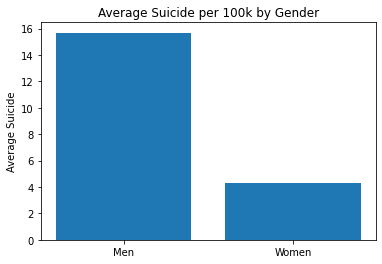

In [31]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
men_mean=suicide_men.mean().mean()
women_mean=suicide_women.mean().mean()
locations = [1, 2]
heights = [men_mean, women_mean]
labels = ['Men', 'Women']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Suicide per 100k by Gender')
plt.ylabel('Average Suicide');

###### Conclusion: Men are more than 3x more likely to commit suicide

### Which attributes have the highest coleration between suicide?

In [32]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
high_df.describe()

,suicide_men_Mdn,suicide_women_Mdn,total_suicide_Mdn,sex_ratio_Mdn,gini_Mdn,emp_rate_Mdn,hdi_Mdn,web_users_Mdn,health_gdp_Mdn,working_hours_Mdn
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,21.604412,5.727647,27.332059,95.363235,28.294118,52.150000,0.802426,65.882353,7.654265,37.410294
std,7.544116,2.282062,8.829911,4.136869,9.485450,15.088341,0.215389,24.934903,3.317503,7.420159
min,13.600000,2.360000,18.700000,84.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.300000,4.210000,20.586250,93.862500,27.575000,50.550000,0.803125,61.900000,6.387500,36.200000
50%,19.025000,5.485000,24.385000,96.550000,31.625000,55.575000,0.871000,73.450000,8.300000,38.650000
75%,25.375000,6.462500,31.252500,98.050000,32.700000,58.987500,0.904250,80.900000,9.302500,39.575000
max,49.650000,14.200000,57.990000,101.000000,40.900000,73.800000,0.942500,95.500000,16.300000,48.000000


In [33]:
low_df.describe()

,suicide_men_Mdn,suicide_women_Mdn,total_suicide_Mdn,sex_ratio_Mdn,gini_Mdn,emp_rate_Mdn,hdi_Mdn,web_users_Mdn,health_gdp_Mdn,working_hours_Mdn
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,7.193406,2.131321,9.324727,100.783333,31.833333,49.466667,0.752591,53.639394,6.651515,30.296970
std,4.743915,1.490771,6.060617,14.672975,10.937983,16.132991,0.209412,24.572825,2.852545,17.717144
min,0.090400,0.038450,0.128850,85.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.870000,0.994500,3.868000,96.350000,31.450000,42.700000,0.731500,35.400000,4.885000,32.200000
50%,8.220000,2.270000,10.350000,98.200000,34.000000,53.500000,0.780500,55.000000,6.930000,38.150000
75%,11.400000,3.040000,15.790000,99.950000,37.450000,59.500000,0.871500,70.300000,8.720000,41.200000
max,14.900000,5.090000,17.620000,163.500000,42.450000,71.350000,0.926000,92.300000,10.750000,47.550000


### Notice a positive coleration as internet users increase

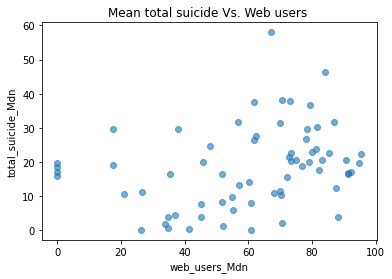

In [34]:
y= list(alldf['total_suicide_Mdn'])
x= list(alldf['web_users_Mdn'])
plt.scatter(x ,  y , alpha=0.6)
plt.xlabel("web_users_Mdn")
plt.ylabel("total_suicide_Mdn")
plt.title('Mean total suicide Vs. Web users ')
plt.show()

### Comparing low and high suicide countries working hours
#### High suicide countries have more working hours

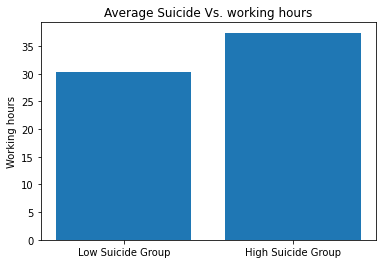

In [35]:
low_df_mean=low_df['working_hours_Mdn'].mean()
high_df_mean=high_df['working_hours_Mdn'].mean()
locations = [1, 2]
heights = [low_df_mean, high_df_mean]
labels = ['Low Suicide Group', 'High Suicide Group']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Suicide Vs. working hours')
plt.ylabel('Working hours');

<a id='conclusions'></a>
## Conclusions

In conclusion, attributes such as gender, working hours and number of internet users have been shown to be highly collerated after deeply studying each one seperatly with respect to data analysis limitations.

Limitations to the analysis:-

- Data that have been filled by mean values which makes the dataset less reliable
- Some countries have been dropped due to less information provided leading to less accurate results
- Limited access to info required from some countries



###  Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1